In [1]:
# DataFlair Iris Flower Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets 
%matplotlib inline

#### import data

In [2]:
data_test = pd.read_csv('test.csv')
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data Analysis

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\Onur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


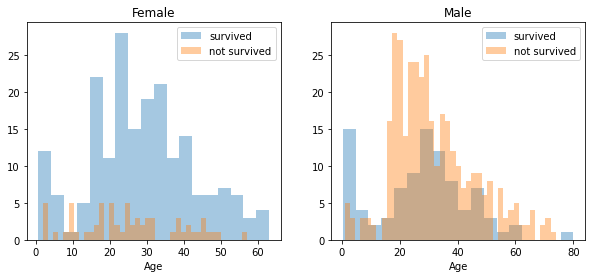

In [6]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Sex']=='female']
men = data[data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

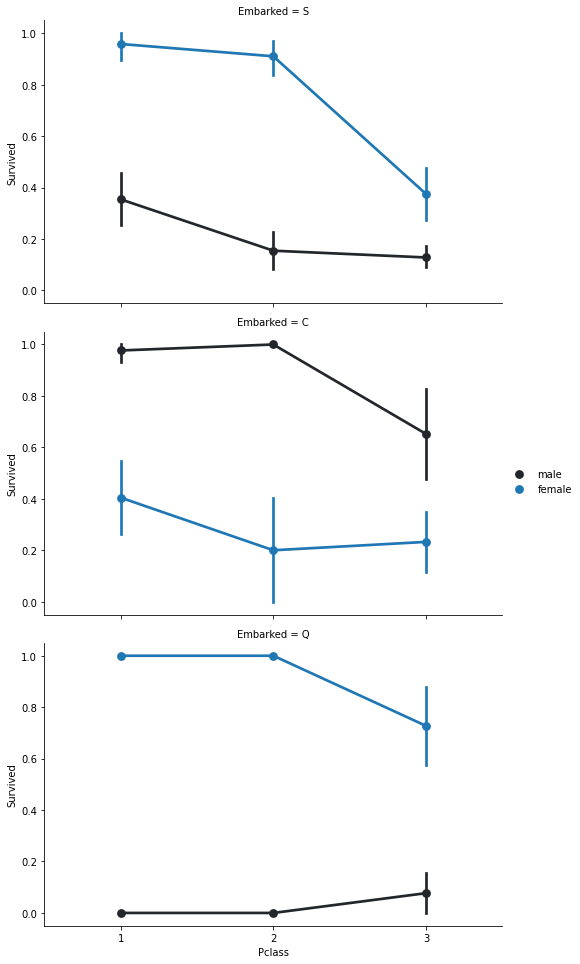

In [7]:
FacetGrid = sns.FacetGrid(data, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

### Data Preprocessing

In [8]:
data_agefix = [data, data_test]

for dataset in data_agefix:
    mean = data["Age"].mean()
    std = data_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = data["Age"].astype(int)
data["Age"].isnull().sum()

0

In [9]:
data_agefix

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex  Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male   22      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
 2                               Heikkinen, Miss. Laina  female   26      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
 4                             Allen, Mr. William Henry    male   35      0   
 ..                                                 ... 

In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
target = data.iloc[:,1]

In [12]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data.shape

(891, 12)

In [16]:
data_cleansed = data.drop(columns={"Cabin", "Name", "Ticket"})

In [17]:
data_cleansed

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,13.0000,S
887,888,1,1,female,19,0,0,30.0000,S
888,889,0,3,female,25,1,2,23.4500,S
889,890,1,1,male,26,0,0,30.0000,C


In [18]:
dummy = pd.get_dummies(data_cleansed['Sex'])

In [19]:
dummy.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [20]:
dummy2 = pd.concat((data_cleansed, dummy), axis = 1)

In [21]:
dummy2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,male,22,1,0,7.2500,S,0,1
1,2,1,1,female,38,1,0,71.2833,C,1,0
2,3,1,3,female,26,0,0,7.9250,S,1,0
3,4,1,1,female,35,1,0,53.1000,S,1,0
4,5,0,3,male,35,0,0,8.0500,S,0,1


In [22]:
data_cleansed = dummy2.drop(columns={"Sex"})

In [23]:
data_cleansed.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,22,1,0,7.2500,S,0,1
1,2,1,1,38,1,0,71.2833,C,1,0
2,3,1,3,26,0,0,7.9250,S,1,0
3,4,1,1,35,1,0,53.1000,S,1,0
4,5,0,3,35,0,0,8.0500,S,0,1


In [24]:
data_cleansed.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
female         0
male           0
dtype: int64

In [25]:
data_cleansed.dropna(axis=0, how='any', inplace=True)

In [26]:
data_cleansed.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
female         0
male           0
dtype: int64

In [27]:
data_cleansed.head(30)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,22,1,0,7.2500,S,0,1
1,2,1,1,38,1,0,71.2833,C,1,0
2,3,1,3,26,0,0,7.9250,S,1,0
3,4,1,1,35,1,0,53.1000,S,1,0
4,5,0,3,35,0,0,8.0500,S,0,1
5,6,0,3,19,0,0,8.4583,Q,0,1
6,7,0,1,54,0,0,51.8625,S,0,1
7,8,0,3,2,3,1,21.0750,S,0,1
8,9,1,3,27,0,2,11.1333,S,1,0
9,10,1,2,14,1,0,30.0708,C,1,0


In [28]:
dummy = pd.get_dummies(data_cleansed['Embarked'])
dummy.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [29]:
dummy2 = pd.concat((data_cleansed, dummy), axis = 1)
dummy2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,1,0,3,22,1,0,7.2500,S,0,1,0,0,1
1,2,1,1,38,1,0,71.2833,C,1,0,1,0,0
2,3,1,3,26,0,0,7.9250,S,1,0,0,0,1
3,4,1,1,35,1,0,53.1000,S,1,0,0,0,1
4,5,0,3,35,0,0,8.0500,S,0,1,0,0,1


In [30]:
data_cleansed = dummy2.drop(columns={"Embarked"})
data_cleansed.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22,1,0,7.2500,0,1,0,0,1
1,2,1,1,38,1,0,71.2833,1,0,1,0,0
2,3,1,3,26,0,0,7.9250,1,0,0,0,1
3,4,1,1,35,1,0,53.1000,1,0,0,0,1
4,5,0,3,35,0,0,8.0500,0,1,0,0,1


In [31]:
target = data_cleansed.iloc[:,1]
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
data_cleansed = data_cleansed.drop(columns={"Survived", "Fare"})
data_cleansed.head()

,PassengerId,Pclass,Age,SibSp,Parch,female,male,C,Q,S
0,1,3,22,1,0,0,1,0,0,1
1,2,1,38,1,0,1,0,1,0,0
2,3,3,26,0,0,1,0,0,0,1
3,4,1,35,1,0,1,0,0,0,1
4,5,3,35,0,0,0,1,0,0,1


In [33]:
X = data_cleansed
y = target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=21)
print("shape of X_train: " + str(X_train.shape))
print("shape of X_test: " + str(X_test.shape))
print("shape of y_train: " + str(y_train.shape))
print("shape of y_test: " + str(y_test.shape))

shape of X_train: (711, 10)
shape of X_test: (178, 10)
shape of y_train: (711,)
shape of y_test: (178,)


In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
model = MLPClassifier(hidden_layer_sizes=(233,),alpha=0.0001)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(233,))

In [36]:
model.score(X_test, y_test)

0.7752808988764045

In [37]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

C:\Users\Onur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
model1.score(X_test, y_test)

0.8033707865168539

In [39]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [40]:
pred = model.predict(np.array(X_test.iloc[1,:]).reshape(1,-1))
print(y_test[1])
print(pred)

1
[1]


### Different Algos

In [41]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [42]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)

In [43]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)

In [44]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)

In [45]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)

C:\Users\Onur\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [46]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)

C:\Users\Onur\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [47]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)

In [48]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
83.15,Support Vector Machines
82.02,Random Forest
78.09,Naive Bayes
71.35,Decision Tree
70.79,Stochastic Gradient Decent
30.34,Perceptron
